# FINAL PROJECT COMP 6600<br> EGG CLASSIFICATION MODEL

In [2]:
# Step 1 - Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Step 2 - Imports + Initial setup
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [4]:
# Step 3 - Data Loading and Preprocessing (With Class Table Output)
IMG_SIZE = 224
BATCH_SIZE = 64

train_dir = '/content/drive/MyDrive/data/train'
val_dir = '/content/drive/MyDrive/data/val'
test_dir = '/content/drive/MyDrive/data/test'

train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20,
    zoom_range=0.2, horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = val_test_datagen.flow_from_directory(val_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical')
test_gen = val_test_datagen.flow_from_directory(test_dir, target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# Show class mapping
class_df = pd.DataFrame(list(train_gen.class_indices.items()), columns=["Class Name", "Class Index"])
print("Class Index Mapping:")
display(class_df)


Found 1200 images belonging to 4 classes.
Found 150 images belonging to 4 classes.
Found 150 images belonging to 4 classes.
Class Index Mapping:


,Class Name,Class Index
0,cracked,0
1,cracked and dirty,1
2,dirty,2
3,healthy,3


In [5]:
# Step 4 - Base VGG19 Model (Frozen)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# Step 5 - Train the Base Model
history_base = model.fit(train_gen, validation_data=val_gen, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1153s 60s/step - accuracy: 0.2659 - loss: 1.8094 - val_accuracy: 0.3000 - val_loss: 1.3869
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1087s 57s/step - accuracy: 0.2713 - loss: 1.5933 - val_accuracy: 0.3467 - val_loss: 1.3571
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1090s 58s/step - accuracy: 0.2722 - loss: 1.5143 - val_accuracy: 0.3667 - val_loss: 1.3361
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1126s 59s/step - accuracy: 0.3048 - loss: 1.4617 - val_accuracy: 0.4400 - val_loss: 1.3166
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1094s 58s/step - accuracy: 0.2896 - loss: 1.4507 - val_accuracy: 0.4333 - val_loss: 1.2957
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1086s 57s/step - accuracy: 0.3151 - loss: 1.4103 - val_accuracy: 0.5200 - val_loss: 1.2770
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1106s 59s/step - accuracy: 0.3469 - loss: 1.3563 - val_accuracy: 0.5400 - val_loss: 1.2614
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1089s 58s/step - accuracy: 0.3097 - loss: 1.3674 - val_accu

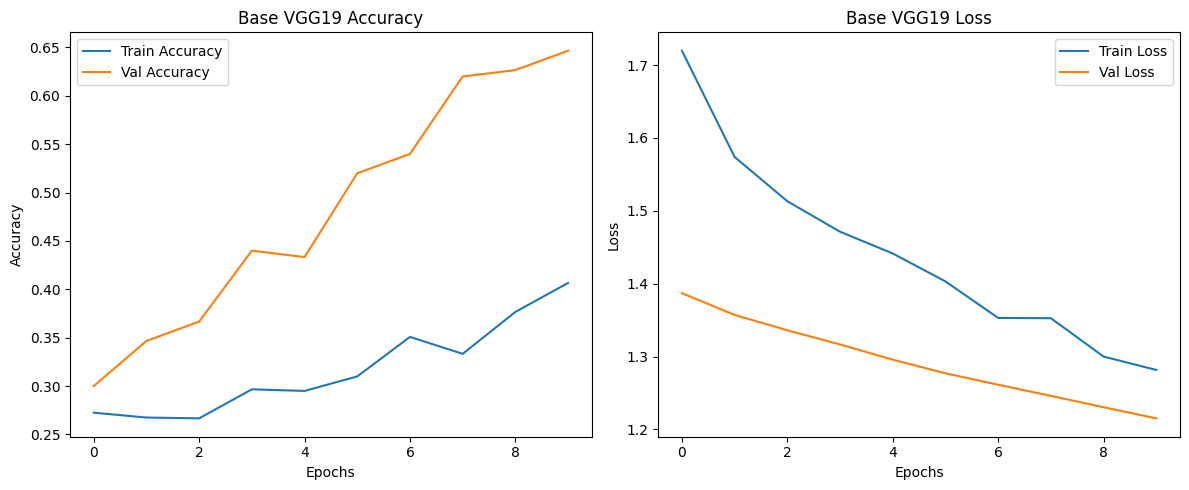

In [7]:
# Step 6 - Plot Training History
def plot_history(history, title='Model'):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_base, "Base VGG19")

3/3 ━━━━━━━━━━━━━━━━━━━━ 121s 33s/step - accuracy: 0.7036 - loss: 1.1978
Test Accuracy (Base VGG19): 0.65
3/3 ━━━━━━━━━━━━━━━━━━━━ 119s 34s/step


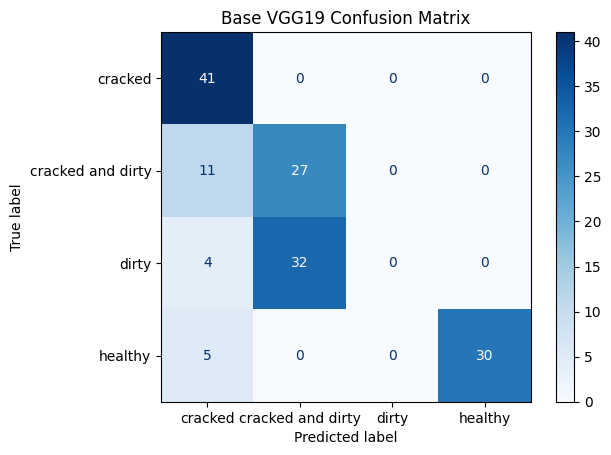

Classification Report (Base VGG19):
                   precision    recall  f1-score   support

          cracked       0.67      1.00      0.80        41
cracked and dirty       0.46      0.71      0.56        38
            dirty       0.00      0.00      0.00        36
          healthy       1.00      0.86      0.92        35

         accuracy                           0.65       150
        macro avg       0.53      0.64      0.57       150
     weighted avg       0.53      0.65      0.58       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Step 7 - Evaluate Base Model (Confusion Matrix & Report)
loss_base, acc_base = model.evaluate(test_gen)
print(f"Test Accuracy (Base VGG19): {acc_base:.2f}")

y_pred = np.argmax(model.predict(test_gen), axis=1)
y_true = test_gen.classes
labels = list(test_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Base VGG19 Confusion Matrix")
plt.show()

print("Classification Report (Base VGG19):")
print(classification_report(y_true, y_pred, target_names=labels))

In [9]:
# Step 8 - Fine-Tune VGG19 (Unfreeze Last Convolution Block)
# Unfreeze last 4 convolutional layers
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Recompile the model (necessary after changing trainable layers)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train again
history_ft = model.fit(train_gen, validation_data=val_gen, epochs=5)

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1658s 87s/step - accuracy: 0.4734 - loss: 1.1828 - val_accuracy: 0.7533 - val_loss: 0.8589
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1626s 86s/step - accuracy: 0.6705 - loss: 0.8805 - val_accuracy: 0.7267 - val_loss: 0.5839
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1633s 86s/step - accuracy: 0.7659 - loss: 0.6344 - val_accuracy: 0.9000 - val_loss: 0.3531
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1645s 86s/step - accuracy: 0.8082 - loss: 0.5167 - val_accuracy: 0.8333 - val_loss: 0.3725
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1665s 88s/step - accuracy: 0.8297 - loss: 0.4319 - val_accuracy: 0.9067 - val_loss: 0.3085


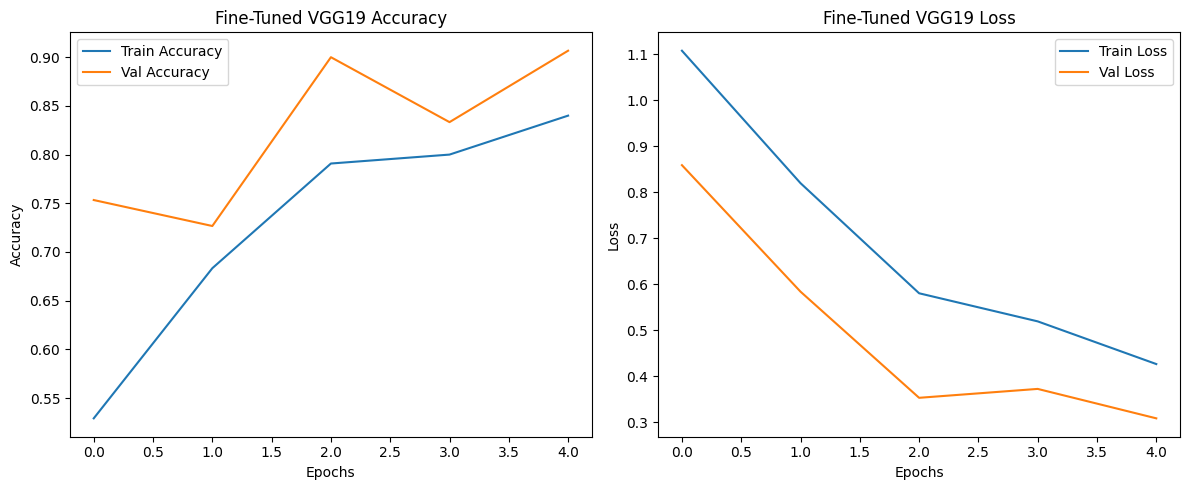

In [10]:
# Step 9 - Plot Fine-Tuning History & Compare
plot_history(history_ft, "Fine-Tuned VGG19")

3/3 ━━━━━━━━━━━━━━━━━━━━ 133s 33s/step - accuracy: 0.8826 - loss: 0.3098
Test Accuracy (Fine-Tuned VGG19): 0.87
3/3 ━━━━━━━━━━━━━━━━━━━━ 118s 34s/step


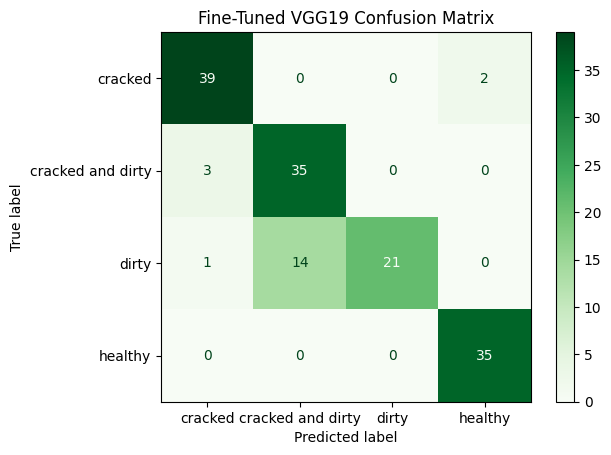

Classification Report (Fine-Tuned VGG19):
                   precision    recall  f1-score   support

          cracked       0.91      0.95      0.93        41
cracked and dirty       0.71      0.92      0.80        38
            dirty       1.00      0.58      0.74        36
          healthy       0.95      1.00      0.97        35

         accuracy                           0.87       150
        macro avg       0.89      0.86      0.86       150
     weighted avg       0.89      0.87      0.86       150



In [11]:
# Step 10 - Evaluate Fine-Tuned Model
loss_ft, acc_ft = model.evaluate(test_gen)
print(f"Test Accuracy (Fine-Tuned VGG19): {acc_ft:.2f}")

y_pred_ft = np.argmax(model.predict(test_gen), axis=1)

cm_ft = confusion_matrix(y_true, y_pred_ft)
disp = ConfusionMatrixDisplay(cm_ft, display_labels=labels)
disp.plot(cmap='Greens')
plt.title("Fine-Tuned VGG19 Confusion Matrix")
plt.show()

print("Classification Report (Fine-Tuned VGG19):")
print(classification_report(y_true, y_pred_ft, target_names=labels))

In [12]:
# Step 11 - Accuracy Improvement Summary
comparison_df = pd.DataFrame({
    "Model": ["Base VGG19", "Fine-Tuned VGG19"],
    "Test Accuracy": [acc_base, acc_ft]
})
print("Accuracy Comparison:")
display(comparison_df)

Accuracy Comparison:


,Model,Test Accuracy
0,Base VGG19,0.653333
1,Fine-Tuned VGG19,0.866667
